<html>

<head>
<meta charset="UTF-8">
<title>Title of the document</title>
</head>

<body>
<h1 id="title">Plots from X-ray absorption calculations using ORCA</h1>
<p>Presentation of the feature engineering applied for ORCA outputs</p>
<p>Data presented here, as new inputs for this jupyter-notebook, comes from the written-shell pipeline created to extract X-ray excited-state features from some specific pair of atoms group (e.g. pair amino acid).</p>
<p>Outputs here are filtered features that account for specific transitions (coreMO -> virtualMO) for the specific pair of atoms group.</p>
</body>
</html>

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import csv as csv
from matplotlib.pyplot import figure
from __future__ import print_function
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

____________________________

In [134]:
from scipy.optimize import leastsq
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

In [180]:
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 18

--------------

<html>

<head>
<meta charset="UTF-8">
<title>Title of the document</title>
</head>

<body>
<h1 id="title">Löwdin Population analysis from </h1>
<h2 id="title"> X-ray absorption spectra calculated using PNO-DFT/ROCIS zora </h2>
<h3 id="title">    System of study: F ${---}$Y</h3>
<h4 id="title">   non-covalent interaction distances varying from 2,5 to 11,0 $\dot{A}$ </h4>
</body>
</html>


#### Loading matrices (data from the pipeline's outputs)
Data in .csv format
##### residue called as A is acting as one at the ground state amino acid
> ##### resA core MO
##### residue called as B is acting as one at the virtual state amino acid
> ##### resB virtual MO

In a pair-aa interaction, e.g. Phe-Tyr, Phenylalanine stands for resA core MO and Tyrosine for resB virtual MO. And after, Tyrosine stands for resA core MO and Phenylalanine for resB virtual MO. Both are calculated and are within the spectra.

> ##### resA core MO - Phenylalanine

In [136]:
#Uncomment the original range to see more peaks outside the expected range
resa_phe="resA_MOcore_FY_"
post=".csv"
list_suf = [25, 26, 27, 28, 29, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110]
#list_suf = [27, 35, 55, 75, 90, 110]
for ii in list_suf:
    globals()['resa_mocore_%s_FY_raw' % str(ii)] = pd.read_csv(resa_phe+str(ii)+post, delimiter=',', index_col='num-1')

resa_mocore_27_FY_raw.head()

,sym,lvl,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
num-1,,,,,,,,,,,,,,,,,,,,
1,C,s,0.0,0.0,0.0,0.0,99.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,C,s,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.3,0.0,0.0,0.0,0.0,0.0,3.6,95.4,0.0,0.0,0.0
11,C,s,0.0,0.0,0.0,0.0,0.0,0.0,0.3,98.7,0.0,0.0,0.0,0.0,0.0,0.2,0.5,0.0,0.0,0.0
2,C,s,99.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,C,s,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,99.3,0.0,0.0,0.0,0.0,0.0,0.0


> ##### resB virt MO - Tyrosine

In [137]:
resb_tyr="resB_MOcore_FY_"
post=".csv"
for ii in list_suf:
    globals()['resb_movirt_%s_FY_raw' % str(ii)] = pd.read_csv(resb_tyr+str(ii)+post, delimiter=',', index_col='num-1')

resb_movirt_27_FY_raw.head()

,sym,lvl,92,93,94,95,96,97,98,99,100,101,102,103
num-1,,,,,,,,,,,,,,
23,atom,lvlMO,0.0,0.0,0.0,0.0,0.9,2.9,0.6,1.2,3.2,0.6,1.3,1.2
24,atom,lvlMO,0.4,0.8,0.0,0.0,2.2,3.8,1.5,1.7,3.8,1.1,0.5,1.9
25,atom,lvlMO,0.2,0.0,0.0,0.0,1.2,22.2,7.7,12.8,1.3,2.1,3.0,3.5
26,atom,lvlMO,0.0,0.0,0.0,0.0,0.3,10.1,3.7,5.8,0.5,0.8,1.8,1.4
27,atom,lvlMO,0.0,0.0,0.0,0.0,0.4,7.5,2.7,7.7,0.5,0.5,0.8,0.8


<html>

<head>
<meta charset="UTF-8">
<title>Title of the document</title>
</head>

<body>
<h1 id="title">Features from  X-ray excited-state properties: </h1>
<h2 id="title">1. The number of transitions </h2>
<h2 id="title">2. The transitions averaged probability </h2>
<h2 id="title">3. The oscillator strength using electronic dipole moment as operator </h2>
<h2 id="title">4. The oscillator strength using velocity dipole moment as operator </h2>
</body>
</html>

#### coreMO vs. virtual MO (core/virt MO)
#### resA(Phe) --> resB(Tyr)

> ### 1. core/virt MO as function of the number of transitions

In [138]:
resab_fy="corevirtMO_matrix_FY_"
post=".csv"
for ii in list_suf:
    globals()['corevirtMO_matrix_%s_FY_raw' % str(ii)] = pd.read_csv(resab_fy+str(ii)+post, delimiter=',', index_col='virt\core')

corevirtMO_matrix_27_FY_raw.head()

,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
virt\core,,,,,,,,,,,,,,,,,,
92,3,2,5,1,1,1,4,3,1,4,2,1,4,2,5,4,3,4
93,5,2,5,1,2,1,5,4,1,3,4,1,4,4,4,4,4,2
94,5,3,5,1,2,1,6,5,2,5,4,2,4,4,4,4,3,3
95,5,4,5,1,1,1,5,5,2,5,4,3,4,4,4,6,4,2
96,5,3,4,1,1,1,4,4,1,3,4,2,3,4,5,3,3,3


> ### 2. core/virt MO as function of the number of transitions averaged probability

In [139]:
resab_ts_fy="corevirtMO_matrix_tspb_FY_"
post=".csv"
for ii in list_suf:
    globals()['corevirtMO_matrix_tspb_%s_FY_raw' % str(ii)] = pd.read_csv(resab_ts_fy+str(ii)+post, delimiter=',', index_col='virt\core')

corevirtMO_matrix_tspb_27_FY_raw.head()

,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
virt\core,,,,,,,,,,,,,,,,,,
92,0.326367,0.995100,0.029640,1.0000,0.99990,0.9861,0.01815,0.295800,0.98730,0.09605,0.489550,0.9902,0.037050,0.490450,0.050960,0.025875,0.326467,0.220275
93,0.158700,0.995150,0.019960,0.9998,0.49995,0.9792,0.07248,0.226000,0.99150,0.27800,0.198375,0.9904,0.024950,0.194825,0.021450,0.012825,0.237575,0.497650
94,0.187600,0.329267,0.020520,0.9996,0.49725,0.9779,0.00755,0.009100,0.49715,0.00522,0.234500,0.4939,0.025650,0.213050,0.055175,0.021775,0.325967,0.328333
95,0.182540,0.013950,0.012640,0.9999,0.99450,0.9810,0.01278,0.148340,0.49465,0.04972,0.228175,0.0186,0.015800,0.201050,0.061350,0.006717,0.239350,0.499000
96,0.145560,0.329800,0.041725,1.0000,0.99990,0.9893,0.23300,0.231575,0.98660,0.32720,0.181950,0.4947,0.055633,0.163550,0.010700,0.124800,0.322467,0.327733


> ### 3. core/virt MO as function of the oscillator strength using electronic dipole moment as operator

In [140]:
resab_fosce_fy="corevirt_fosce_FY_"
post=".csv"
for ii in list_suf:
    globals()['corevirt_mo_fosce_%s_FY_raw' % str(ii)] = pd.read_csv(resab_fosce_fy+str(ii)+post, delimiter=',', index_col='virt\core')

corevirt_mo_fosce_27_FY_raw.head()

,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
virt\core,,,,,,,,,,,,,,,,,,
92,0.006312,0.000083,4.705410e-06,1.935600e-05,0.000021,0.128511,0.000143,0.000105,0.000032,3.104510e-06,0.009469,0.000162,5.881770e-06,0.007402,0.000371,2.881990e-06,0.000122,0.000039
93,0.010611,0.000013,4.595310e-07,2.028590e-06,0.000034,0.117189,0.000241,0.000183,0.000003,2.301930e-06,0.013264,0.000025,5.744140e-07,0.009407,0.000948,3.784730e-07,0.000012,0.000006
94,0.000637,0.010160,1.431480e-06,1.415330e-05,0.000092,0.140934,0.000010,0.000006,0.000010,3.675190e-07,0.000797,0.015241,1.789350e-06,0.001044,0.000105,1.099700e-06,0.000045,0.000009
95,0.007795,0.000463,6.364410e-08,6.009400e-07,0.000016,0.004856,0.000391,0.000065,0.000007,7.790250e-05,0.009744,0.000618,7.955510e-08,0.004950,0.000826,2.381120e-07,0.000003,0.000002
96,0.029981,0.000148,1.351800e-06,1.540000e-06,0.000002,0.000745,0.002580,0.000722,0.000003,9.736350e-06,0.037477,0.000221,1.802410e-06,0.037579,0.002152,4.653950e-06,0.000009,0.000025


> ### 4. core/virt MO as function of the oscillator strength using velocity dipole moment as operator

In [141]:
resab_foscv_fy="corevirt_foscv_FY_"
post=".csv"
for ii in list_suf:
    globals()['corevirt_mo_foscv_%s_FY_raw' % str(ii)] = pd.read_csv(resab_foscv_fy+str(ii)+post, delimiter=',', index_col='virt\core')

corevirt_mo_foscv_27_FY_raw.head()

,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
virt\core,,,,,,,,,,,,,,,,,,
92,0.005975,0.000041,4.783430e-06,3.075500e-05,0.000017,0.120655,0.000135,0.000099,0.000083,5.004890e-06,0.008962,0.000076,5.979290e-06,0.007028,0.000352,3.355180e-06,0.000126,0.000037
93,0.010412,0.000003,5.446780e-07,2.630470e-06,0.000032,0.109963,0.000235,0.000165,0.000004,2.592780e-06,0.013015,0.000005,6.808480e-07,0.008935,0.000900,4.776060e-07,0.000015,0.000007
94,0.000624,0.008359,2.161160e-06,1.693420e-05,0.000076,0.132422,0.000010,0.000005,0.000018,5.512080e-07,0.000780,0.012539,2.701440e-06,0.001009,0.000102,1.577630e-06,0.000066,0.000015
95,0.008102,0.000414,4.348590e-08,7.849220e-07,0.000011,0.004755,0.000416,0.000067,0.000009,7.317190e-05,0.010127,0.000552,5.435740e-08,0.004884,0.000830,2.398790e-07,0.000002,0.000002
96,0.030624,0.000139,1.786400e-06,2.052000e-06,0.000003,0.000845,0.002267,0.000535,0.000004,1.264180e-05,0.038281,0.000209,2.381860e-06,0.038319,0.002192,6.787840e-06,0.000011,0.000026


### Main functions to present data according to the features

In [142]:
def selecting_atm_matrix(df, atoms_list):
    """
    it returns MO matrix (df) having just the atoms in atoms_list.
    """
    col_list = df.index.tolist() #listing index (elements from column 0)
    #dff = df.loc[:, (df != 0).any(axis=0)] #removing zero columns
    return df.loc[[i for i in atoms_list if i in col_list]] #returning just columns in the both lists intersection
#atoms_core=resa_mocore_GFG9Y_raw.index.tolist() #all C-core atoms
#[i for i in atoms_a if i in atoms_core] #atoms_a intersection atoms_core

In [143]:
def nonzero_mo_matrix(df):
    """
    it returns MO matrix (df) having just non-zero MO population.
    """
    return df.loc[:, (df != 0).any(axis=0)] #removing zero columns

In [144]:
def crop_by_loewdin_p(df,pop):
    """
    it returns MO matrix (df) having just a Loewdin MO population contribution greater than (100*pop)%.
    pop is a number between 0 and 1.
    """
    cols = [col for col, val in df.sum()[2:].iteritems() if val > (pop*100)]
    #iteritem() create a zip with the index_col and the values
    cols.insert(0,'lvl')
    cols.insert(0,'sym')
    #to add on the top the first two columns removed in the previous sum() evaluation
    return df[cols] #showing the fisrt two columns and those having population greater than pop*100%

In [145]:
def cropping_matrix(df, df1, df2):
    """
    it returns a cropped MO matrix from df using as parameters the indices in df1 and df2.
    df1 index are column names from df and df2 index are the rows from df
    """
    try:
        dff = df[df1.axes[1][2:].tolist()] #saving specific columns
    except KeyError:
        tmp_mo = [item for item in df1.axes[1][2:].tolist() if item in df.axes[1][2:].tolist()]
        #removing items in the first list that are not in the second one
        dff = df[tmp_mo]
    try:
        return dff.loc[[int(i) for i in df2.axes[1][2:].tolist()]] #returning specific rows
    except KeyError:
        tmp_mo2 = [item for item in df2.axes[1][2:].tolist() if item in dff.T.axes[1][2:].tolist()]
        # dff.T to obtain the index_col as the head row
        return dff.loc[[int(i) for i in tmp_mo2]] #returning specific rows
# the first two elements in df2.axes[1] and df1.axes[1] are "sym" and "lvl", that's why I used df.axes[1][2:]

<html>

<head>
<meta charset="UTF-8">
<title>Title of the document</title>
</head>

<body>
<h3 id="title">Reducing Löwdin Population MO matrices by removing non-contributing MO</h3>
<h4> Case for core MO in the resA</h4>
</body>
</html>

In [146]:
for ii in list_suf:
    globals()['resa_mocore_%s_FY' % str(ii)] = nonzero_mo_matrix(globals()['resa_mocore_%s_FY_raw' % str(ii)])

resa_mocore_27_FY.head()

,sym,lvl,7,11,12,13,14,17,18,20,21
num-1,,,,,,,,,,,
1,C,s,0.0,99.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,C,s,0.0,0.0,0.0,0.3,0.3,0.0,0.0,3.6,95.4
11,C,s,0.0,0.0,0.0,0.3,98.7,0.0,0.0,0.2,0.5
2,C,s,99.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,C,s,0.0,0.0,0.0,0.0,0.0,0.2,99.3,0.0,0.0


<html>

<head>
<meta charset="UTF-8">
<title>Title of the document</title>
</head>

<body>
<h4> Case for virtual MO in the resB</h4>
</body>
</html>
<html>

In [147]:
for ii in list_suf:
    globals()['resb_movirt_%s_FY' % str(ii)] = nonzero_mo_matrix(globals()['resb_movirt_%s_FY_raw' % str(ii)])

resb_movirt_27_FY.head()

,sym,lvl,92,93,94,95,96,97,98,99,100,101,102,103
num-1,,,,,,,,,,,,,,
23,atom,lvlMO,0.0,0.0,0.0,0.0,0.9,2.9,0.6,1.2,3.2,0.6,1.3,1.2
24,atom,lvlMO,0.4,0.8,0.0,0.0,2.2,3.8,1.5,1.7,3.8,1.1,0.5,1.9
25,atom,lvlMO,0.2,0.0,0.0,0.0,1.2,22.2,7.7,12.8,1.3,2.1,3.0,3.5
26,atom,lvlMO,0.0,0.0,0.0,0.0,0.3,10.1,3.7,5.8,0.5,0.8,1.8,1.4
27,atom,lvlMO,0.0,0.0,0.0,0.0,0.4,7.5,2.7,7.7,0.5,0.5,0.8,0.8


<html>

<head>
<meta charset="UTF-8">
</head>

<body>
<h4 id="title">Reducing further resB Löwdin Population MO by just considering upper 67% population contribution</h4>
</body>
</html>

In [148]:
#for counting transitions in MO having greater than 67% of Loewdin population contribution in resB
pop = 0.67
for ii in list_suf:
    globals()['resb_movirt_%s_FY_pop' % str(ii)] = crop_by_loewdin_p(globals()['resb_movirt_%s_FY_raw' % str(ii)],pop)

resb_movirt_27_FY_pop.head()

,sym,lvl,94,97,99,100
num-1,,,,,,
23,atom,lvlMO,0.0,2.9,1.2,3.2
24,atom,lvlMO,0.0,3.8,1.7,3.8
25,atom,lvlMO,0.0,22.2,12.8,1.3
26,atom,lvlMO,0.0,10.1,5.8,0.5
27,atom,lvlMO,0.0,7.5,7.7,0.5


In [149]:
#[int(i) for i in resb_movirt_G5FG5Y.axes[1][2:].tolist()]

<html>

<head>
<meta charset="UTF-8">
</head>

<body>
<h3 id="title">Cropping core virtual MO matrices by resA and resB matrices boundaries:</h3>
</body>
</html>

> ### 1st. feature: core/virt MO as function of the number of transitions

<html>

<head>
<meta charset="UTF-8">
</head>

<body>
<h4 id="title">resA and resB having just contributing MO</h4>
</body>
</html>

In [150]:
for ii in list_suf:
    globals()['core_virt_mo_%s_FY' % str(ii)] = cropping_matrix(globals()['corevirtMO_matrix_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY' % str(ii)])

core_virt_mo_27_FY.head()

,7,11,12,13,14,17,18,20,21
virt\core,,,,,,,,,
92,3,1,1,4,3,2,1,2,5
93,5,2,1,5,4,4,1,4,4
94,5,2,1,6,5,4,2,4,4
95,5,1,1,5,5,4,3,4,4
96,5,1,1,4,4,4,2,4,5


<html>

<head>
<meta charset="UTF-8">
</head>

<body>
<h4 id="title">resA and resB, when resB has just upper a set percentage of MO contribution</h4>
</body>
</html>

In [151]:
for ii in list_suf:
    globals()['core_virt_mo_%s_FY_pop' % str(ii)] = cropping_matrix(globals()['corevirtMO_matrix_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY_pop' % str(ii)])

core_virt_mo_27_FY_pop.head()

,7,11,12,13,14,17,18,20,21
virt\core,,,,,,,,,
94,5,2,1,6,5,4,2,4,4
97,4,1,1,3,4,3,1,3,4
99,6,2,2,2,2,4,2,3,3
100,7,2,3,2,3,5,2,3,3


> ### 2nd. feature: core/virt MO as function of the number of transitions averaged probability

<html>

<head>
<meta charset="UTF-8">
</head>

<body>
<h4 id="title">resA and resB having just contributing MO</h4>
</body>
</html>

In [152]:
for ii in list_suf:
    globals()['corevirtMO_matrix_tspb_%s_FY' % str(ii)] = cropping_matrix(globals()['corevirtMO_matrix_tspb_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY' % str(ii)])

corevirtMO_matrix_tspb_27_FY.head()

,7,11,12,13,14,17,18,20,21
virt\core,,,,,,,,,
92,0.326367,0.99990,0.9861,0.01815,0.295800,0.489550,0.9902,0.490450,0.050960
93,0.158700,0.49995,0.9792,0.07248,0.226000,0.198375,0.9904,0.194825,0.021450
94,0.187600,0.49725,0.9779,0.00755,0.009100,0.234500,0.4939,0.213050,0.055175
95,0.182540,0.99450,0.9810,0.01278,0.148340,0.228175,0.0186,0.201050,0.061350
96,0.145560,0.99990,0.9893,0.23300,0.231575,0.181950,0.4947,0.163550,0.010700


<html>

<head>
<meta charset="UTF-8">
</head>

<body>
<h4 id="title">resA and resB, when resB has just upper a set percentage of MO contribution</h4>
</body>
</html>

In [153]:
for ii in list_suf:
    globals()['corevirtMO_matrix_tspb_%s_FY_pop' % str(ii)] = cropping_matrix(globals()['corevirtMO_matrix_tspb_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY_pop' % str(ii)])

corevirtMO_matrix_tspb_27_FY_pop.head()

,7,11,12,13,14,17,18,20,21
virt\core,,,,,,,,,
94,0.187600,0.49725,0.9779,0.007550,0.00910,0.234500,0.49390,0.21305,0.055175
97,0.191950,0.99970,0.9850,0.017233,0.01695,0.255933,0.99030,0.12410,0.202250
99,0.044617,0.49955,0.4869,0.491050,0.49340,0.066925,0.49205,0.16470,0.321333
100,0.006957,0.49985,0.3246,0.484650,0.16860,0.009740,0.49215,0.16370,0.014000


> ### 3. core/virt MO as function of the oscillator strength using electronic dipole moment as operator

<html>

<head>
<meta charset="UTF-8">
</head>

<body>
<h4 id="title">resA and resB having just contributing MO</h4>
</body>
</html>

In [154]:
for ii in list_suf:
    globals()['corevirt_mo_fosce_%s_FY' % str(ii)] = cropping_matrix(globals()['corevirt_mo_fosce_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY' % str(ii)])

corevirt_mo_fosce_27_FY.head()

,7,11,12,13,14,17,18,20,21
virt\core,,,,,,,,,
92,0.006312,0.000021,0.128511,0.000143,0.000105,0.009469,0.000162,0.007402,0.000371
93,0.010611,0.000034,0.117189,0.000241,0.000183,0.013264,0.000025,0.009407,0.000948
94,0.000637,0.000092,0.140934,0.000010,0.000006,0.000797,0.015241,0.001044,0.000105
95,0.007795,0.000016,0.004856,0.000391,0.000065,0.009744,0.000618,0.004950,0.000826
96,0.029981,0.000002,0.000745,0.002580,0.000722,0.037477,0.000221,0.037579,0.002152


<html>

<head>
<meta charset="UTF-8">
</head>

<body>
<h4 id="title">resA and resB, when resB has just upper a set percentage of MO contribution</h4>
</body>
</html>

In [155]:
for ii in list_suf:
    globals()['corevirt_mo_fosce_%s_FY_pop' % str(ii)] = cropping_matrix(globals()['corevirt_mo_fosce_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY_pop' % str(ii)])

corevirt_mo_fosce_27_FY_pop.head()

,7,11,12,13,14,17,18,20,21
virt\core,,,,,,,,,
94,0.000637,0.000092,0.140934,0.000010,0.000006,0.000797,0.015241,0.001044,0.000105
97,0.024414,0.000068,0.011673,0.000096,0.000058,0.032552,0.000184,0.025013,0.002032
99,0.003529,0.000002,0.008659,0.000184,0.000788,0.005294,0.000212,0.037394,0.003409
100,0.000508,0.000002,0.004953,0.000324,0.000498,0.000712,0.000107,0.035278,0.002445


> ### 4. core/virt MO as function of the oscillator strength using velocity dipole moment as operator

<html>

<head>
<meta charset="UTF-8">
</head>

<body>
<h4 id="title">resA and resB having just contributing MO</h4>
</body>
</html>

In [156]:
for ii in list_suf:
    globals()['corevirt_mo_foscv_%s_FY' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscv_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY' % str(ii)])

corevirt_mo_foscv_27_FY.head()

,7,11,12,13,14,17,18,20,21
virt\core,,,,,,,,,
92,0.005975,0.000017,0.120655,0.000135,0.000099,0.008962,0.000076,0.007028,0.000352
93,0.010412,0.000032,0.109963,0.000235,0.000165,0.013015,0.000005,0.008935,0.000900
94,0.000624,0.000076,0.132422,0.000010,0.000005,0.000780,0.012539,0.001009,0.000102
95,0.008102,0.000011,0.004755,0.000416,0.000067,0.010127,0.000552,0.004884,0.000830
96,0.030624,0.000003,0.000845,0.002267,0.000535,0.038281,0.000209,0.038319,0.002192


<html>

<head>
<meta charset="UTF-8">
</head>

<body>
<h4 id="title">resA and resB, when resB has just upper a set percentage of MO contribution</h4>
</body>
</html>

In [157]:
for ii in list_suf:
    globals()['corevirt_mo_foscv_%s_FY_pop' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscv_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY_pop' % str(ii)])

corevirt_mo_foscv_27_FY_pop.head()

,7,11,12,13,14,17,18,20,21
virt\core,,,,,,,,,
94,0.000624,0.000076,0.132422,0.000010,0.000005,0.000780,0.012539,0.001009,0.000102
97,0.024762,0.000038,0.012589,0.000078,0.000048,0.033016,0.000233,0.025502,0.002039
99,0.003685,0.000003,0.009309,0.000143,0.000457,0.005528,0.000253,0.037505,0.003384
100,0.000504,0.000003,0.005348,0.000254,0.000288,0.000706,0.000129,0.035380,0.002452


___________________________

<html>

<head>
<meta charset="UTF-8">
</head>

<body>
<h3 id="title">Results</h3>
<h4 id="title">Features presentation</h4>
</body>
</html>

<html>

<head>
<meta charset="UTF-8">
</head>

<body>
<h4 id="title">Pair-aa distance in Å</h4>
</body>
</html>

> ##### 1st feature by a set percentage population

In [158]:
for ii in list_suf:
    print(f"Distance: {ii/10} sum of transitions number {globals()['core_virt_mo_%s_FY_pop' % str(ii)].sum().sum()}")


Distance: 2.5 sum of transitions number 106
Distance: 2.6 sum of transitions number 101
Distance: 2.7 sum of transitions number 113
Distance: 2.8 sum of transitions number 85
Distance: 2.9 sum of transitions number 86
Distance: 3.0 sum of transitions number 224
Distance: 3.5 sum of transitions number 200
Distance: 4.0 sum of transitions number 210
Distance: 4.5 sum of transitions number 203
Distance: 5.0 sum of transitions number 224
Distance: 5.5 sum of transitions number 194
Distance: 6.0 sum of transitions number 200
Distance: 6.5 sum of transitions number 233
Distance: 7.0 sum of transitions number 219
Distance: 7.5 sum of transitions number 209
Distance: 8.0 sum of transitions number 207
Distance: 8.5 sum of transitions number 207
Distance: 9.0 sum of transitions number 203
Distance: 9.5 sum of transitions number 201
Distance: 10.0 sum of transitions number 203
Distance: 10.5 sum of transitions number 208
Distance: 11.0 sum of transitions number 221


> ##### 2nd feature by a set percentage population

In [159]:
for ii in list_suf:
    print(f"Distance: {ii/10} sum of averaged transitions probability {globals()['corevirtMO_matrix_tspb_%s_FY_pop' % str(ii)].sum().sum()}")


Distance: 2.5 sum of averaged transitions probability 17.94272
Distance: 2.6 sum of averaged transitions probability 15.122686000000002
Distance: 2.7 sum of averaged transitions probability 11.68421314
Distance: 2.8 sum of averaged transitions probability 9.406528999999999
Distance: 2.9 sum of averaged transitions probability 10.3754365
Distance: 3.0 sum of averaged transitions probability 10.94163106
Distance: 3.5 sum of averaged transitions probability 11.016983859999998
Distance: 4.0 sum of averaged transitions probability 12.66304637
Distance: 4.5 sum of averaged transitions probability 23.892026129999998
Distance: 5.0 sum of averaged transitions probability 17.83234421
Distance: 5.5 sum of averaged transitions probability 11.406474170000001
Distance: 6.0 sum of averaged transitions probability 11.24885991
Distance: 6.5 sum of averaged transitions probability 13.81625062
Distance: 7.0 sum of averaged transitions probability 17.13718806
Distance: 7.5 sum of averaged transitions prob

> ##### 3rd feature

In [160]:
for ii in list_suf:
    print(f"Distance: {ii/10} sum of all fosce {globals()['corevirt_mo_fosce_%s_FY' % str(ii)].sum().sum()}")


Distance: 2.5 sum of all fosce 0.972722125325
Distance: 2.6 sum of all fosce 0.908941496402
Distance: 2.7 sum of all fosce 0.9292355246299999
Distance: 2.8 sum of all fosce 0.75134201139
Distance: 2.9 sum of all fosce 0.730510043275
Distance: 3.0 sum of all fosce 0.633819872855
Distance: 3.5 sum of all fosce 0.599626585766
Distance: 4.0 sum of all fosce 0.50515864662
Distance: 4.5 sum of all fosce 0.6759136164129
Distance: 5.0 sum of all fosce 0.5772460786689999
Distance: 5.5 sum of all fosce 0.5921654825734199
Distance: 6.0 sum of all fosce 0.49762014407236
Distance: 6.5 sum of all fosce 0.53322429222347
Distance: 7.0 sum of all fosce 0.537454499314155
Distance: 7.5 sum of all fosce 0.43208075595515
Distance: 8.0 sum of all fosce 0.25561601857386673
Distance: 8.5 sum of all fosce 0.23445291272999996
Distance: 9.0 sum of all fosce 0.23094914861
Distance: 9.5 sum of all fosce 0.23269548116000002
Distance: 10.0 sum of all fosce 0.22616615695199999
Distance: 10.5 sum of all fosce 0.222658

> ##### 4th feature

In [163]:
for ii in list_suf:
    print(f"Distance: {ii/10} sum of all foscv {globals()['corevirt_mo_foscv_%s_FY' % str(ii)].sum().sum()}")


Distance: 2.5 sum of all foscv 0.9772349694758
Distance: 2.6 sum of all foscv 0.9070582520570001
Distance: 2.7 sum of all foscv 0.9098568096
Distance: 2.8 sum of all foscv 0.74002988441
Distance: 2.9 sum of all foscv 0.7190171993800001
Distance: 3.0 sum of all foscv 0.626059648244
Distance: 3.5 sum of all foscv 0.586424932064
Distance: 4.0 sum of all foscv 0.49167284226600005
Distance: 4.5 sum of all foscv 0.6659446904624001
Distance: 5.0 sum of all foscv 0.565075937097
Distance: 5.5 sum of all foscv 0.58229611808954
Distance: 6.0 sum of all foscv 0.48992349904376
Distance: 6.5 sum of all foscv 0.5223296901188199
Distance: 7.0 sum of all foscv 0.527108115339415
Distance: 7.5 sum of all foscv 0.42827843421045797
Distance: 8.0 sum of all foscv 0.2543398377838667
Distance: 8.5 sum of all foscv 0.23274155633999996
Distance: 9.0 sum of all foscv 0.22838606376
Distance: 9.5 sum of all foscv 0.23018303416699998
Distance: 10.0 sum of all foscv 0.223564356462
Distance: 10.5 sum of all foscv 0.2

______________________________

#### Plotting

In [184]:
AB_distances = [ii/10 for ii in list_suf]
ts_pop_sum = [globals()['core_virt_mo_%s_FY_pop' % str(ii)].sum().sum() for ii in list_suf]
tspb_pop_sum = [globals()['corevirtMO_matrix_tspb_%s_FY_pop' % str(ii)].sum().sum() for ii in list_suf]
fosce_all_sum = [globals()['corevirt_mo_fosce_%s_FY' % str(ii)].sum().sum() for ii in list_suf]
foscv_all_sum = [globals()['corevirt_mo_foscv_%s_FY' % str(ii)].sum().sum() for ii in list_suf]

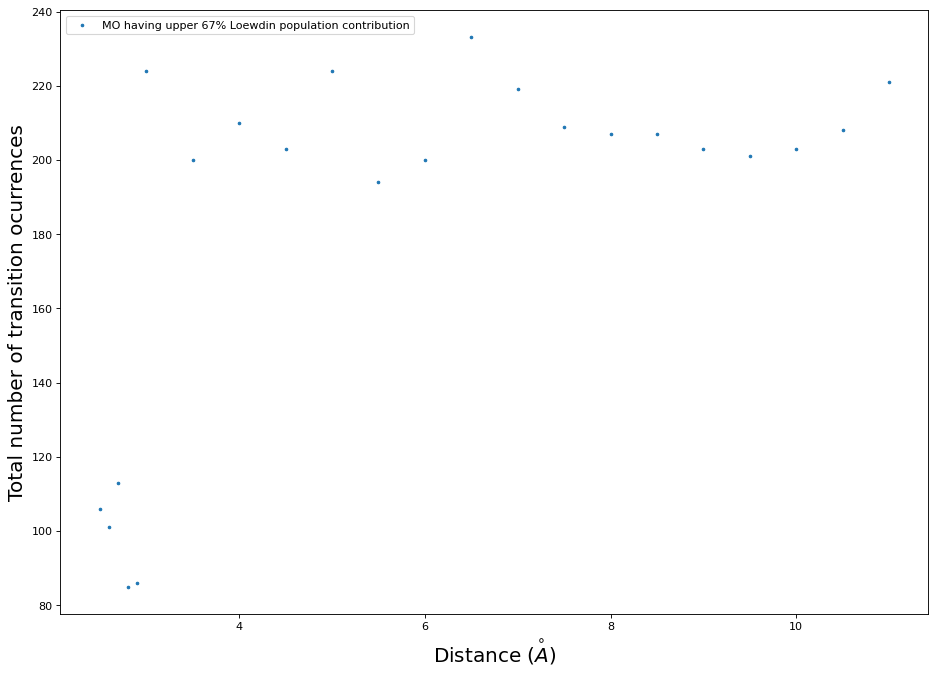

In [189]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n1 = fig.add_subplot(111)

#for ii in list_suf:
n1.scatter(AB_distances, ts_pop_sum, s=5, label='MO having upper 67% Loewdin population contribution')

plt.xlabel('Distance ($\overset{\circ}{A}$)')
plt.ylabel('Total number of transition ocurrences')
plt.legend(loc='upper left');
plt.show()

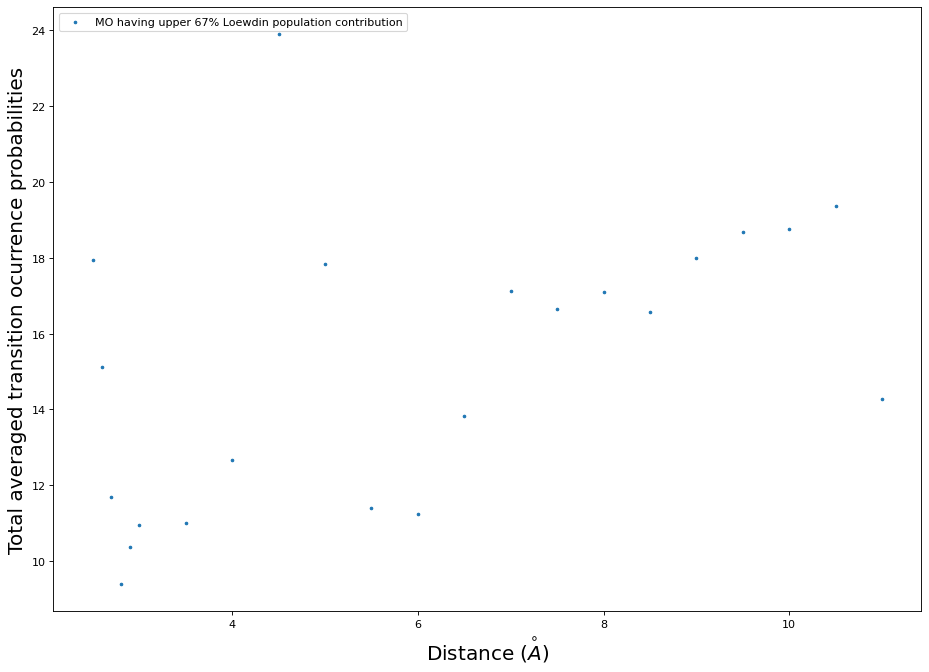

In [190]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n1 = fig.add_subplot(111)

#for ii in list_suf:
n1.scatter(AB_distances, tspb_pop_sum, s=5, label='MO having upper 67% Loewdin population contribution')

plt.xlabel('Distance ($\overset{\circ}{A}$)')
plt.ylabel('Total averaged transition ocurrence probabilities')
plt.legend(loc='upper left');
plt.show()

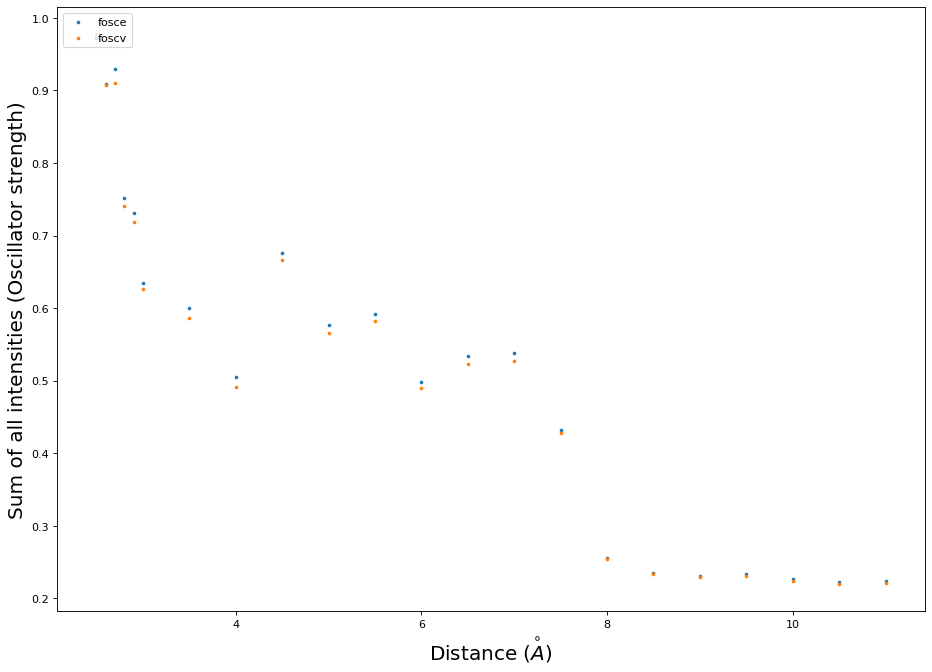

In [185]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n1 = fig.add_subplot(111)

#for ii in list_suf:
n1.scatter(AB_distances, fosce_all_sum, s=5, label='fosce')
n1.scatter(AB_distances, foscv_all_sum, s=5, label='foscv')

#label=str(ii/10)+'$\overset{\circ}{A}$'
plt.xlabel('Distance ($\overset{\circ}{A}$)')
plt.ylabel('Sum of all intensities (Oscillator strength)')
plt.legend(loc='upper left');
plt.show()

##### dx,dy and dz correspond to the x-, y- and z-components of the transition moment (d)

### G$_{2}$YG$_{n}$PG$_ {11-n}$ ( $n=0..9$ )
#### optimized at PM7 and DFTB3-D3H4
#### by similarity

In [162]:
#Uncomment the original range to see more peaks outside the expected range
file=""
post="_opt_gms.csv"
g2ypg11 = pd.read_csv(file+'G2YPG11'+post, delimiter=',')
g2ygpg10 = pd.read_csv(file+'G2YGPG10'+post, delimiter=',')
g2yg2pg9 = pd.read_csv(file+'G2YG2PG9'+post, delimiter=',')
g2yg3pg8 = pd.read_csv(file+'G2YG3PG8'+post, delimiter=',')
g2yg4pg7 = pd.read_csv(file+'G2YG4PG7'+post, delimiter=',')
g2yg5pg6 = pd.read_csv(file+'G2YG5PG6'+post, delimiter=',')
g2yg6pg5 = pd.read_csv(file+'G2YG6PG5'+post, delimiter=',')
g2yg7pg4 = pd.read_csv(file+'G2YG7PG4'+post, delimiter=',')
g2yg8pg3 = pd.read_csv(file+'G2YG8PG3'+post, delimiter=',')
g2yg9pg2 = pd.read_csv(file+'G2YG9PG2'+post, delimiter=',')
g2yg12 = pd.read_csv(file+'G2YG12'+post, delimiter=',')
g4pg10 = pd.read_csv(file+'G4PG10'+post, delimiter=',')

g2ypg11.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
g2ygpg10.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
g2yg2pg9.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
g2yg3pg8.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
g2yg4pg7.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
g2yg5pg6.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
g2yg6pg5.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
g2yg7pg4.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
g2yg8pg3.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
g2yg9pg2.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
g2yg12.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
g4pg10.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']

g2yg9pg2

FileNotFoundError: [Errno 2] No such file or directory: 'G2YPG11_opt_gms.csv'

In [ ]:
#add yft and yfc to see a broader energy range
fig = plt.figure(figsize=(14, 10), dpi=80)
n2 = fig.add_subplot(111)
#n2.scatter(g2ypg11[['Energy']],g2ypg11[['Intensity']], s=5, label='G2YPG11')
#n2.scatter(g2ygpg10[['Energy']],g2ygpg10[['Intensity']], s=5, label='G2YGPG10')
#n2.scatter(g2yg2pg9[['Energy']],g2yg2pg9[['Intensity']], s=5, label='G2YG2PG9')
#n2.scatter(g2yg3pg8[['Energy']],g2yg3pg8[['Intensity']], s=5, label='G2YG3PG8')
#n2.scatter(g2yg4pg7[['Energy']],g2yg4pg7[['Intensity']], s=5, label='G2YG4PG7')
#n2.scatter(g2yg5pg6[['Energy']],g2yg5pg6[['Intensity']], s=5, label='G2YG5PG6')
n2.scatter(g2yg6pg5[['Energy']],g2yg6pg5[['Intensity']], s=5, label='G2YG6PG5')
n2.scatter(g2yg7pg4[['Energy']],g2yg7pg4[['Intensity']], s=5, label='G2YG7PG4')
n2.scatter(g2yg8pg3[['Energy']],g2yg8pg3[['Intensity']], s=5, label='G2YG8PG3')
n2.scatter(g2yg9pg2[['Energy']],g2yg9pg2[['Intensity']], s=5, label='G2YG9PG2')
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
plt.show()

In [ ]:
#add yft and yfc to see a broader energy range
fig = plt.figure(figsize=(14, 10), dpi=80)
n2 = fig.add_subplot(111)
n2.scatter(g2ypg11[['Energy']],g2ypg11[['Intensity']], s=5, label='G2YPG11')
n2.scatter(g2ygpg10[['Energy']],g2ygpg10[['Intensity']], s=5, label='G2YGPG10')
n2.scatter(g2yg2pg9[['Energy']],g2yg2pg9[['Intensity']], s=5, label='G2YG2PG9')
n2.scatter(g2yg3pg8[['Energy']],g2yg3pg8[['Intensity']], s=5, label='G2YG3PG8')
n2.scatter(g2yg4pg7[['Energy']],g2yg4pg7[['Intensity']], s=5, label='G2YG4PG7')
#n2.scatter(g2yg5pg6[['Energy']],g2yg5pg6[['Intensity']], s=5, label='G2YG5PG6')
#n2.scatter(g2yg6pg5[['Energy']],g2yg6pg5[['Intensity']], s=5, label='G2YG6PG5')
#n2.scatter(g2yg7pg4[['Energy']],g2yg7pg4[['Intensity']], s=5, label='G2YG7PG4')
#n2.scatter(g2yg8pg3[['Energy']],g2yg8pg3[['Intensity']], s=5, label='G2YG8PG3')
#n2.scatter(g2yg9pg2[['Energy']],g2yg9pg2[['Intensity']], s=5, label='G2YG9PG2')
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
plt.show()

In [ ]:
#add yft and yfc to see a broader energy range
fig = plt.figure(figsize=(14, 10), dpi=80)
n2 = fig.add_subplot(111)
#n2.scatter(g2ypg11[['Energy']],g2ypg11[['Intensity']], s=5, label='G2YPG11')
#n2.scatter(g2ygpg10[['Energy']],g2ygpg10[['Intensity']], s=5, label='G2YGPG10')
#n2.scatter(g2yg2pg9[['Energy']],g2yg2pg9[['Intensity']], s=5, label='G2YG2PG9')
#n2.scatter(g2yg3pg8[['Energy']],g2yg3pg8[['Intensity']], s=5, label='G2YG3PG8')
n2.scatter(g2yg4pg7[['Energy']],g2yg4pg7[['Intensity']], s=5, label='G2YG4PG7')
n2.scatter(g2yg5pg6[['Energy']],g2yg5pg6[['Intensity']], s=5, label='G2YG5PG6')
n2.scatter(g2yg6pg5[['Energy']],g2yg6pg5[['Intensity']], s=5, label='G2YG6PG5')
#n2.scatter(g2yg7pg4[['Energy']],g2yg7pg4[['Intensity']], s=5, label='G2YG7PG4')
#n2.scatter(g2yg8pg3[['Energy']],g2yg8pg3[['Intensity']], s=5, label='G2YG8PG3')
#n2.scatter(g2yg9pg2[['Energy']],g2yg9pg2[['Intensity']], s=5, label='G2YG9PG2')
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
plt.show()

In [ ]:
#add yft and yfc to see a broader energy range
fig = plt.figure(figsize=(14, 10), dpi=80)
n2 = fig.add_subplot(111)
#n2.scatter(g2ypg11[['Energy']],g2ypg11[['Intensity']], s=5, label='G2YPG11')
#n2.scatter(g2ygpg10[['Energy']]-0.05,g2ygpg10[['Intensity']], s=5, label='G2YGPG10')
#n2.scatter(g2yg2pg9[['Energy']]-0.13,g2yg2pg9[['Intensity']], s=5, label='G2YG2PG9')
#n2.scatter(g2yg3pg8[['Energy']]-0.21,g2yg3pg8[['Intensity']], s=5, label='G2YG3PG8')
n2.scatter(g2yg4pg7[['Energy']],g2yg4pg7[['Intensity']], s=5, label='G2YG4PG7')
n2.scatter(g2yg5pg6[['Energy']],g2yg5pg6[['Intensity']], s=5, label='G2YG5PG6')
n2.scatter(g2yg6pg5[['Energy']],g2yg6pg5[['Intensity']], s=5, label='G2YG6PG5')
n2.scatter(g2yg7pg4[['Energy']],g2yg7pg4[['Intensity']], s=5, label='G2YG7PG4')
#n2.scatter(g2yg8pg3[['Energy']]-0.4,g2yg8pg3[['Intensity']], s=5, label='G2YG8PG3')
#n2.scatter(g2yg9pg2[['Energy']]-0.25,g2yg9pg2[['Intensity']], s=5, label='G2YG9PG2')
n2.scatter(g2yg12[['Energy']],g2yg12[['Intensity']], s=5, label='G2YG12')
n2.scatter(g4pg10[['Energy']],g4pg10[['Intensity']], s=5, label='G4PG10')
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
plt.show()